In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def get_history_summary(history,title):
    n = len(history)
    average = {'accuracy': 0, 'loss':0,'val_accuracy':0, 'val_loss':0 }
    best = {'accuracy': 0, 'loss':10000000,'val_accuracy':0, 'val_loss':100000000 }
    for i in range(n):
        last_epoch = len(history[i]['loss']) - 1
        average['accuracy'] += history[i]['accuracy'][last_epoch]
        average['loss'] += history[i]['loss'][last_epoch]
        average['val_accuracy'] += history[i]['val_accuracy'][last_epoch]
        average['val_loss'] += history[i]['val_loss'][last_epoch]
    
        best['accuracy'] = max(best['accuracy'],history[i]['accuracy'][last_epoch])
        best['loss'] = min(best['loss'] , history[i]['loss'][last_epoch])
        best['val_accuracy'] = max(best['val_accuracy'], history[i]['val_accuracy'][last_epoch])
        best['val_loss'] = min(best['val_loss'], history[i]['val_loss'][last_epoch])
        
    average['accuracy'] = average['accuracy']/n
    average['loss'] = average['loss']/n
    average['val_accuracy'] = average['val_accuracy']/n
    average['val_loss'] = average['val_loss']/n

    labels = list(average.keys())
    average_values = list(average.values())
    best_values = list(best.values())

    bar_width = 0.35
    index = np.arange(len(labels))
    bar1 = plt.bar(index,average_values, bar_width, color= '#ee8b0d', label= 'Average')
    bar2 = plt.bar(index + bar_width, best_values, bar_width, color= 'b', label= 'Best')
    for i, v in enumerate(average_values):
        plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom') 
    for i, v in enumerate(best_values):
        plt.text(i + bar_width, v + 0.01, str(round(v, 4)), ha='center', va='bottom') 

    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(f"Comparison of Average and Best Metrics for {title}")
    plt.xticks([i + bar_width / 2 for i in index])
    plt.xticks([i + bar_width / 2 for i in index], labels)
    plt.legend()
    plt.savefig(f"{title} summary")
    plt.show()
    return average

In [4]:
cnn_history = np.load("./History/cnn_history.npy",allow_pickle=True)

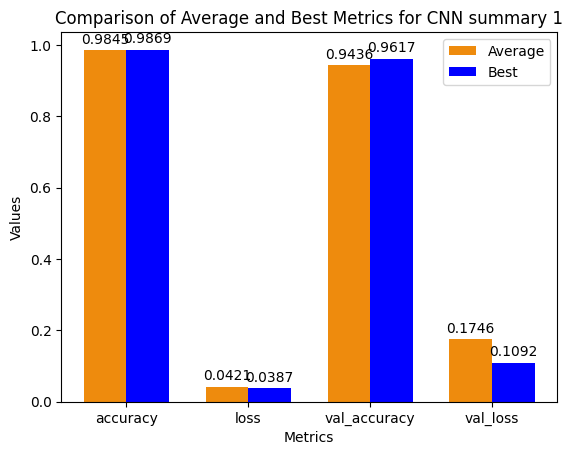

In [8]:
cnn_metrics = get_history_summary(cnn_history, "CNN summary 1")

In [11]:
round(cnn_metrics['val_accuracy'],6)

0.943587

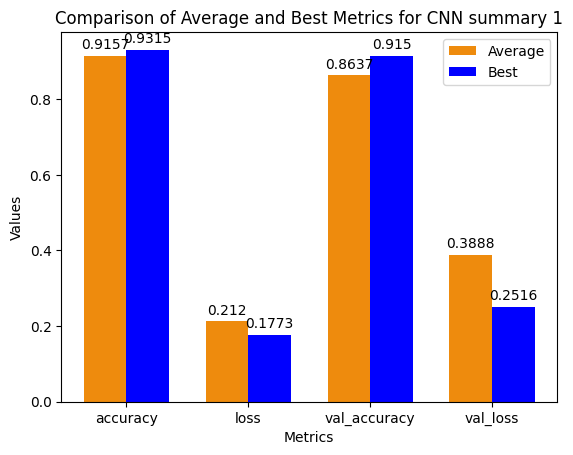

0.863671

In [12]:
cnn_lstm_history = np.load("./History/cnn_lstm_history.npy",allow_pickle=True)
cnn_lstm_metrics = get_history_summary(cnn_lstm_history, "CNN summary 1")
round(cnn_lstm_metrics['val_accuracy'],6)

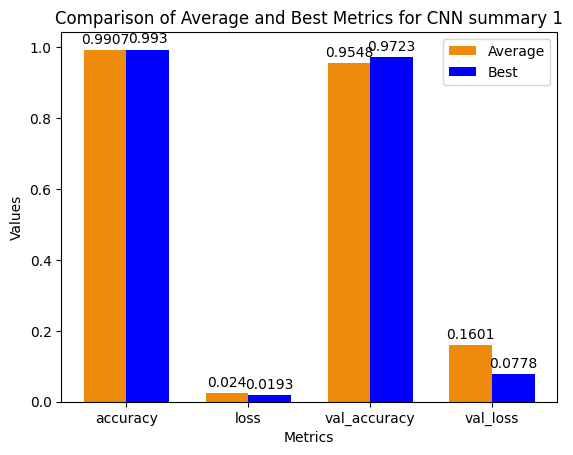

0.954754

In [13]:
fddlm_history = np.load("./History/fddlm_history.npy",allow_pickle=True)
fddlm_metrics = get_history_summary(fddlm_history, "CNN summary 1")
round(fddlm_metrics['val_accuracy'],6)